<a href="https://colab.research.google.com/github/leticiajsx/imersaoDados4Alura/blob/main/projeto_imers%C3%A3o_dados_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto: População em SC atualmente x População em SC previsão

> Conectar meu drive para pegar csv

In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Importando bibliotecas importantes

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [89]:
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/indicadores-pessoas-sc - Página1.csv", decimal=',')


*   decimal: separador dos decimais



> Renomear as colunas para ficar no padrão de variaveis do python

In [90]:
dados = dados.rename(columns={'Matrículas no ensino fundamental': 'Matrículas_ensino_fundamental'})
dados = dados.rename(columns={'Matrículas no ensino médio': 'Matrículas_ensino_médio'})
dados = dados.rename(columns={'População no último censo': 'População_último_censo'})
dados = dados.rename(columns={'Densidade demográfica': 'Densidade_demográfica'})
dados = dados.rename(columns={'População estimada': 'População_estimada'})
dados = dados.rename(columns={'PIB per capita': 'PIB_per_capita'})

In [91]:
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita
0,Abdon Batista,359 matrículas,89 matrículas,2653 pessoas,"11,25 hab/km²",2534 pessoas,"25435,92 R$"
1,Abelardo Luz,2233 matrículas,666 matrículas,17100 pessoas,"17,94 hab/km²",18015 pessoas,"36959,79 R$"
2,Agrolândia,1320 matrículas,331 matrículas,9323 pessoas,"44,92 hab/km²",11160 pessoas,"25390,33 R$"
3,Agronômica,679 matrículas,159 matrículas,4904 pessoas,"37,57 hab/km²",5570 pessoas,"29713,26 R$"
4,Água Doce,774 matrículas,324 matrículas,6961 pessoas,"5,30 hab/km²",7160 pessoas,"49860,90 R$"


> Remover linhas que possuam dados em branco

In [92]:
dados = dados.dropna(axis=0)

> Tratar dados que possuam letras e numeros

In [93]:
dados['Matrículas_ensino_fundamental'] = dados['Matrículas_ensino_fundamental'].str.split(expand = True)[0]
dados['Matrículas_ensino_fundamental'] = dados['Matrículas_ensino_fundamental'].astype(int)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita
0,Abdon Batista,359,89 matrículas,2653 pessoas,"11,25 hab/km²",2534 pessoas,"25435,92 R$"
1,Abelardo Luz,2233,666 matrículas,17100 pessoas,"17,94 hab/km²",18015 pessoas,"36959,79 R$"
2,Agrolândia,1320,331 matrículas,9323 pessoas,"44,92 hab/km²",11160 pessoas,"25390,33 R$"
3,Agronômica,679,159 matrículas,4904 pessoas,"37,57 hab/km²",5570 pessoas,"29713,26 R$"
4,Água Doce,774,324 matrículas,6961 pessoas,"5,30 hab/km²",7160 pessoas,"49860,90 R$"


In [94]:
dados['Matrículas_ensino_médio'] = dados['Matrículas_ensino_médio'].str.split(expand = True)[0]
dados['Matrículas_ensino_médio'] = dados['Matrículas_ensino_médio'].astype(int)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita
0,Abdon Batista,359,89,2653 pessoas,"11,25 hab/km²",2534 pessoas,"25435,92 R$"
1,Abelardo Luz,2233,666,17100 pessoas,"17,94 hab/km²",18015 pessoas,"36959,79 R$"
2,Agrolândia,1320,331,9323 pessoas,"44,92 hab/km²",11160 pessoas,"25390,33 R$"
3,Agronômica,679,159,4904 pessoas,"37,57 hab/km²",5570 pessoas,"29713,26 R$"
4,Água Doce,774,324,6961 pessoas,"5,30 hab/km²",7160 pessoas,"49860,90 R$"


In [95]:
dados['População_último_censo'] = dados['População_último_censo'].str.split(expand = True)[0]
dados['População_último_censo'] = dados['População_último_censo'].astype(int)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita
0,Abdon Batista,359,89,2653,"11,25 hab/km²",2534 pessoas,"25435,92 R$"
1,Abelardo Luz,2233,666,17100,"17,94 hab/km²",18015 pessoas,"36959,79 R$"
2,Agrolândia,1320,331,9323,"44,92 hab/km²",11160 pessoas,"25390,33 R$"
3,Agronômica,679,159,4904,"37,57 hab/km²",5570 pessoas,"29713,26 R$"
4,Água Doce,774,324,6961,"5,30 hab/km²",7160 pessoas,"49860,90 R$"


In [96]:
dados['População_estimada'] = dados['População_estimada'].str.split(expand = True)[0]
dados['População_estimada'] = dados['População_estimada'].astype(int)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita
0,Abdon Batista,359,89,2653,"11,25 hab/km²",2534,"25435,92 R$"
1,Abelardo Luz,2233,666,17100,"17,94 hab/km²",18015,"36959,79 R$"
2,Agrolândia,1320,331,9323,"44,92 hab/km²",11160,"25390,33 R$"
3,Agronômica,679,159,4904,"37,57 hab/km²",5570,"29713,26 R$"
4,Água Doce,774,324,6961,"5,30 hab/km²",7160,"49860,90 R$"


In [97]:
dados['Densidade_demográfica_split'] = dados['Densidade_demográfica'].str.split(expand = True)[0]
dados["Densidade_demográfica_split"] = dados["Densidade_demográfica_split"].str.replace(",",".").astype(float)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita,Densidade_demográfica_split
0,Abdon Batista,359,89,2653,"11,25 hab/km²",2534,"25435,92 R$",11.25
1,Abelardo Luz,2233,666,17100,"17,94 hab/km²",18015,"36959,79 R$",17.94
2,Agrolândia,1320,331,9323,"44,92 hab/km²",11160,"25390,33 R$",44.92
3,Agronômica,679,159,4904,"37,57 hab/km²",5570,"29713,26 R$",37.57
4,Água Doce,774,324,6961,"5,30 hab/km²",7160,"49860,90 R$",5.30


In [98]:
dados['PIB_per_capita_split'] = dados['PIB_per_capita'].str.split(expand = True)[0]
dados["PIB_per_capita_split"] = dados["PIB_per_capita_split"].str.replace(",",".").astype(float)
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita,Densidade_demográfica_split,PIB_per_capita_split
0,Abdon Batista,359,89,2653,"11,25 hab/km²",2534,"25435,92 R$",11.25,25435.92
1,Abelardo Luz,2233,666,17100,"17,94 hab/km²",18015,"36959,79 R$",17.94,36959.79
2,Agrolândia,1320,331,9323,"44,92 hab/km²",11160,"25390,33 R$",44.92,25390.33
3,Agronômica,679,159,4904,"37,57 hab/km²",5570,"29713,26 R$",37.57,29713.26
4,Água Doce,774,324,6961,"5,30 hab/km²",7160,"49860,90 R$",5.30,49860.90


In [99]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 294
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Municípios                     293 non-null    object 
 1   Matrículas_ensino_fundamental  293 non-null    int64  
 2   Matrículas_ensino_médio        293 non-null    int64  
 3   População_último_censo         293 non-null    int64  
 4   Densidade_demográfica          293 non-null    object 
 5   População_estimada             293 non-null    int64  
 6   PIB_per_capita                 293 non-null    object 
 7   Densidade_demográfica_split    293 non-null    float64
 8   PIB_per_capita_split           293 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 22.9+ KB


In [100]:
dados.head()

,Municípios,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,Densidade_demográfica,População_estimada,PIB_per_capita,Densidade_demográfica_split,PIB_per_capita_split
0,Abdon Batista,359,89,2653,"11,25 hab/km²",2534,"25435,92 R$",11.25,25435.92
1,Abelardo Luz,2233,666,17100,"17,94 hab/km²",18015,"36959,79 R$",17.94,36959.79
2,Agrolândia,1320,331,9323,"44,92 hab/km²",11160,"25390,33 R$",44.92,25390.33
3,Agronômica,679,159,4904,"37,57 hab/km²",5570,"29713,26 R$",37.57,29713.26
4,Água Doce,774,324,6961,"5,30 hab/km²",7160,"49860,90 R$",5.30,49860.90


> Visualizar a correlação entre os dados

In [102]:
dados.corr()

,Matrículas_ensino_fundamental,Matrículas_ensino_médio,População_último_censo,População_estimada,Densidade_demográfica_split,PIB_per_capita_split
Matrículas_ensino_fundamental,1.000000,0.995669,0.992724,0.994755,0.571777,0.230742
Matrículas_ensino_médio,0.995669,1.000000,0.993934,0.995623,0.574101,0.228722
População_último_censo,0.992724,0.993934,1.000000,0.997924,0.560612,0.201872
População_estimada,0.994755,0.995623,0.997924,1.000000,0.584111,0.210501
Densidade_demográfica_split,0.571777,0.574101,0.560612,0.584111,1.000000,0.151464
PIB_per_capita_split,0.230742,0.228722,0.201872,0.210501,0.151464,1.000000


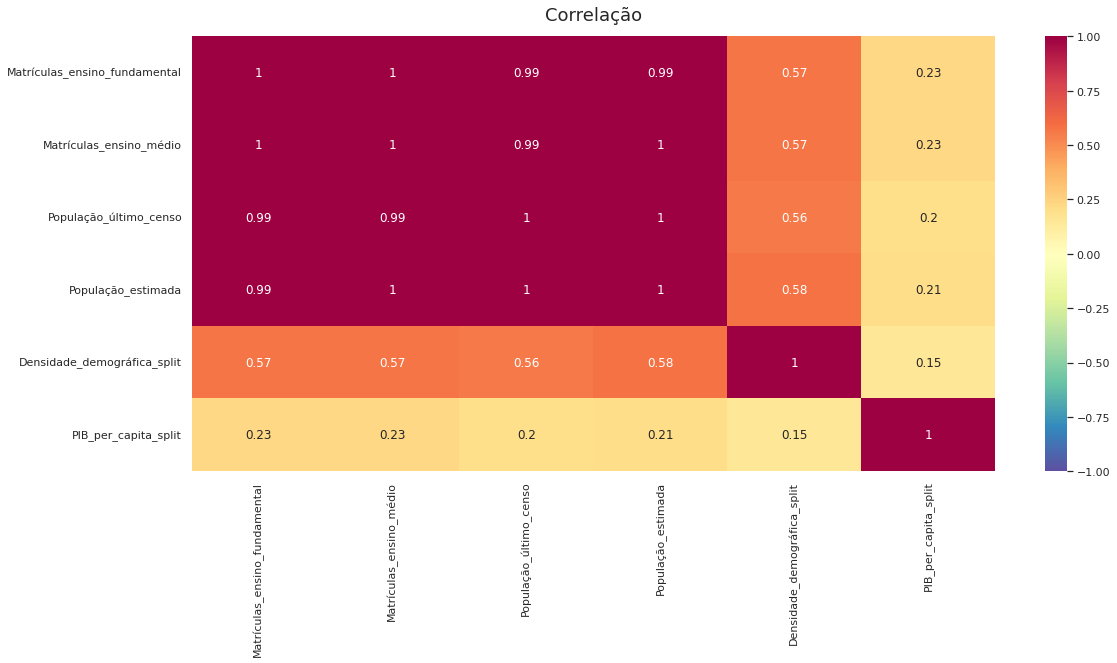

In [200]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
heatmap = sns.heatmap(dados.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral_r')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

> Visualização dos dados em relação a população estimada



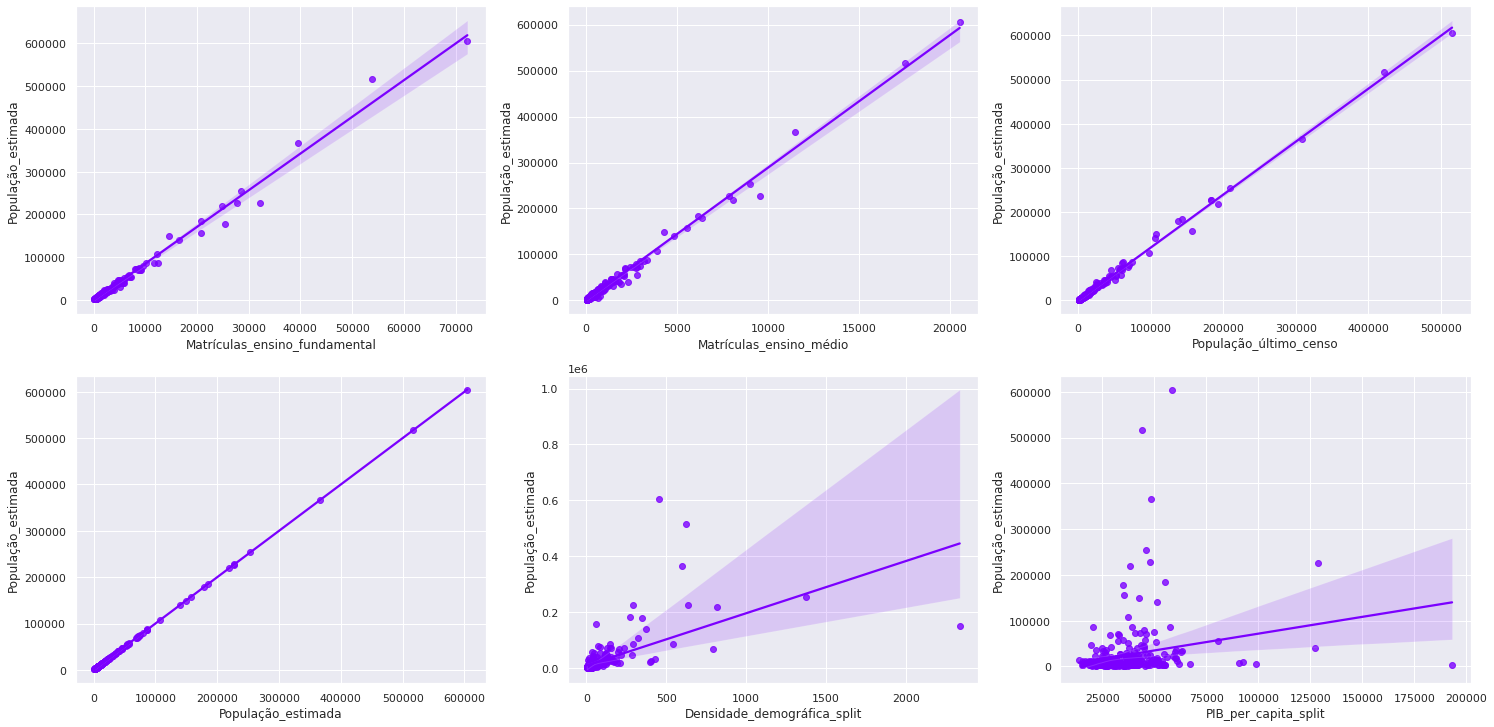

In [236]:
dados_for = dados.drop(['Municípios', 'Densidade_demográfica', 'PIB_per_capita'], axis = 1)
plt.figure(figsize = (25,60))
sns.set_theme(style="darkgrid", palette="gist_rainbow_r")

x = 1
for item in dados_for:
    plt.subplot(9, 3, x)
    ax = sns.regplot(data = dados, x = item, y = 'População_estimada')
    
    x += 1

> Treinamento do modelo utilizando regressão linear

In [165]:
x = dados[['População_último_censo', 'Matrículas_ensino_fundamental', 'Matrículas_ensino_médio']]
y = dados['População_estimada']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 54)

lr = LinearRegression()

lr.fit(X_train, y_train) 

LinearRegression()

In [167]:
y_pred = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [168]:
print(mae_lr)
print(r2_lr)

1367.2997872869676
0.993960932818315


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


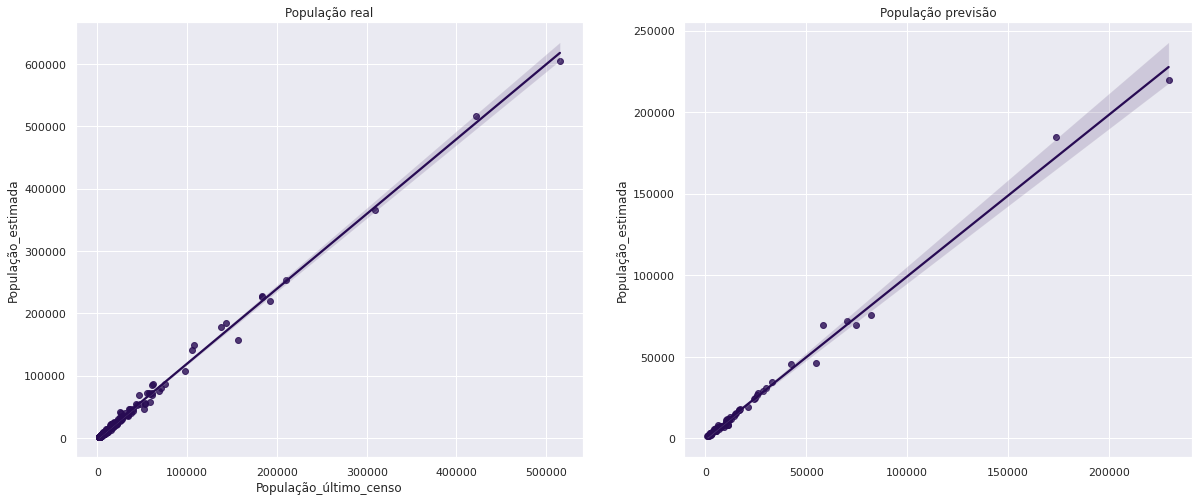

In [209]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
sns.set_theme(style="darkgrid", palette="Dark2")

ax1.set_title('População real')
sns.regplot(x=dados['População_último_censo'], y=dados['População_estimada'], ax=ax1);

ax2.set_title('População previsão')
sns.regplot(y_pred, y_test, ax=ax2);